In [104]:
import pandas as pd

Importing Marketing File and Showing the header and first few rows

In [105]:
file_path_url = "/home/hossein/Downloads/marketing campaign.xlsx"
df = pd.read_excel(file_path_url, engine='openpyxl')
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/home/hossein/Downloads/marketing campaign.xlsx'

Check for the duplicate rows

In [ ]:
duplicates = df[df.duplicated()]
print("Duplicate rows:\n", duplicates)

Duplicate rows:
 Empty DataFrame
Columns: [MarketID, MarketSize, LocationID, AgeOfStore, Promotion, week, SalesInThousands]
Index: []


Checking for the odds values by group the values of each column
Starting with MarketSize

In [ ]:
###for col in df.columns:
print(f"Grouping by {df.columns[1]}:")
grouped = df.groupby(df.columns[1]).size()
print(grouped)
##print(df.columns[1])

Grouping by MarketSize:
MarketSize
  Large      1
 Medium      2
 small       1
Large      167
MEDIUM       1
Medium     317
SMALL        1
Small       56
Small_       1
Smalll       1
dtype: int64


From the above result we can see that only three Market Size are there but in different case and with some spelling mistake.
So to fine tune the market size, let replace it with the only Small, Medium and Large.

In [ ]:
def modify_marketSize(x): 
    if "small".lower() in x.lower():
        return "Small"
    else:
        if "medium".lower() in x.lower():
            return "Medium"
        else:
            if "large".lower() in x.lower():
                return "Large"
    return " "

for i in range(len(df)):
    df.loc[i, 'MarketSize'] = modify_marketSize(df.loc[i, 'MarketSize'])

print(f"Grouping by {df.columns[1]}:")
grouped = df.groupby(df.columns[1]).size()
print(grouped)

Grouping by MarketSize:
MarketSize
Large     168
Medium    320
Small      60
dtype: int64


Doing same with the third Column to find outlier

In [ ]:
print(f"Grouping by {df.columns[2]}:")
grouped = df.groupby(df.columns[2]).size()
print(grouped)

Grouping by LocationID:
LocationID
1      4
2      4
3      4
4      4
5      4
      ..
919    4
920    4
2O4    1
3O7    1
51l    1
Length: 140, dtype: int64


Remove the outlier which have only one values, like 3O7, 2O4 and 51l


In [ ]:
df.loc[df['LocationID'] == '3O7', 'LocationID'] = 307
df.loc[df['LocationID'] == '2O4', 'LocationID'] = 204
df.loc[df['LocationID'] == '51l', 'LocationID'] = 511

Doing same with the Fourth Column to find outlier

In [ ]:
print(f"Grouping by {df.columns[3]}:")
grouped = df.groupby(df.columns[3]).size()
print(grouped)

Grouping by AgeOfStore:
AgeOfStore
1     80
2     20
3     32
4     44
5     44
6     36
7     40
8     40
9     28
10    24
11    16
12    24
13    20
14    12
15     8
17     4
18     8
19    20
20     4
22    12
23     8
24    12
25     4
27     4
28     4
dtype: int64


In [ ]:
print(f"Grouping by {df.columns[4]}:")
grouped = df.groupby(df.columns[4]).size()
print(grouped)

Grouping by Promotion:
Promotion
1    172
2    188
3    188
dtype: int64


In [ ]:
print(f"Grouping by {df.columns[5]}:")
grouped = df.groupby(df.columns[5]).size()
print(grouped)

Grouping by week:
week
1          136
2          136
3          136
4          136
2000         1
4000000      1
one          1
three        1
dtype: int64


Removing outlier based on the initution and common sense

In [ ]:
df.loc[df['week'] == 'one', 'week'] = 1
df.loc[df['week'] == 'three', 'week'] = 3
df.loc[df['week'] == 2000, 'week'] = 2
df.loc[df['week'] == 4000000, 'week'] = 4

df.loc[df['SalesInThousands'] == 404, 'SalesInThousands'] = 40.4
df.loc[df['SalesInThousands'] == 6263, 'SalesInThousands'] = 62.63
df.loc[df['SalesInThousands'] == '68,42', 'SalesInThousands'] = 68.42
df.loc[df['SalesInThousands'] == '77,17', 'SalesInThousands'] = 77.17


In [ ]:
print(f"Grouping by {df.columns[6]}:")
grouped = df.groupby(df.columns[6]).size()
print(grouped)

Grouping by SalesInThousands:
SalesInThousands
17.34    1
19.26    1
22.18    1
23.35    1
23.44    1
23.93    1
24.75    1
24.77    1
24.82    1
25.40    1
25.70    1
26.68    1
27.26    1
27.37    1
27.55    1
27.71    1
27.72    1
27.81    1
27.98    1
28.62    1
29.03    1
29.12    1
29.30    1
29.64    1
30.08    1
30.26    1
30.37    1
30.52    1
30.81    1
30.98    1
31.62    1
31.85    1
31.94    1
32.05    1
32.18    1
32.21    1
32.51    1
32.61    1
32.77    1
32.90    1
33.14    1
33.35    1
33.42    1
33.64    1
33.73    1
33.85    1
34.27    1
34.33    1
34.46    1
34.67    1
34.75    1
35.10    1
35.16    1
35.24    1
35.30    1
35.46    1
35.60    1
35.67    1
35.68    1
35.85    1
35.86    1
36.05    1
36.17    2
36.24    1
36.39    1
36.70    1
36.80    2
36.88    1
37.14    1
37.17    1
37.20    1
37.29    1
37.32    2
37.41    1
37.45    1
37.47    1
37.84    1
37.90    1
37.93    1
37.94    1
38.26    1
38.30    1
38.41    1
38.51    1
38.56    1
38.64    1
38.65  

In [ ]:
df['SalesInThousands'] = pd.to_numeric(df['SalesInThousands'], errors='coerce')

In [ ]:
def replace_comma_with_dot(column):
    column_as_str = column.astype(str)
    replaced_column = column_as_str.str.replace(',', '.')
    return replaced_column

# Apply the function to the 'Value' column
df['SalesInThousands'] = replace_comma_with_dot(df['SalesInThousands'])

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = df['SalesInThousands'].quantile(0.25)
Q3 = df['SalesInThousands'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lower_bound:\n", lower_bound)
print("upper_bound:\n", upper_bound)

# Identify outliers
outliers = df[(df['SalesInThousands'] < lower_bound) | (df['SalesInThousands'] > upper_bound)]
print("Outliers:\n", outliers)

lower_bound:
 16.06625
upper_bound:
 86.59625
Outliers:
      MarketID MarketSize LocationID  AgeOfStore  Promotion week  \
80          3      Large        202           8          1    1   
83          3      Large        202           8          1    4   
84          3      Large        203          12          3    1   
88          3      Large        204           1          2    1   
90          3      Large        204           1          2    3   
93          3      Large        205          19          3    2   
95          3      Large        205          19          3    4   
99          3      Large        206          11          3    4   
100         3      Large        207           1          3    1   
103         3      Large        207           1          3    4   
104         3      Large        208           1          3    1   
106         3      Large        208           1          3    3   
108         3      Large        209           1          1    1   
109  

In [ ]:
# Load the data

# Calculate descriptive statistics for each promotion

descriptive_stats = df.groupby(df.columns[5])[df.columns[6]].agg(['mean', 'median', 'std'])
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

print(descriptive_stats)

           mean  median        std
week                              
1     53.790584  50.200  16.969321
2     53.386569  51.090  16.121453
3     53.364706  49.835  17.059869
4     53.036912  49.670  16.982982


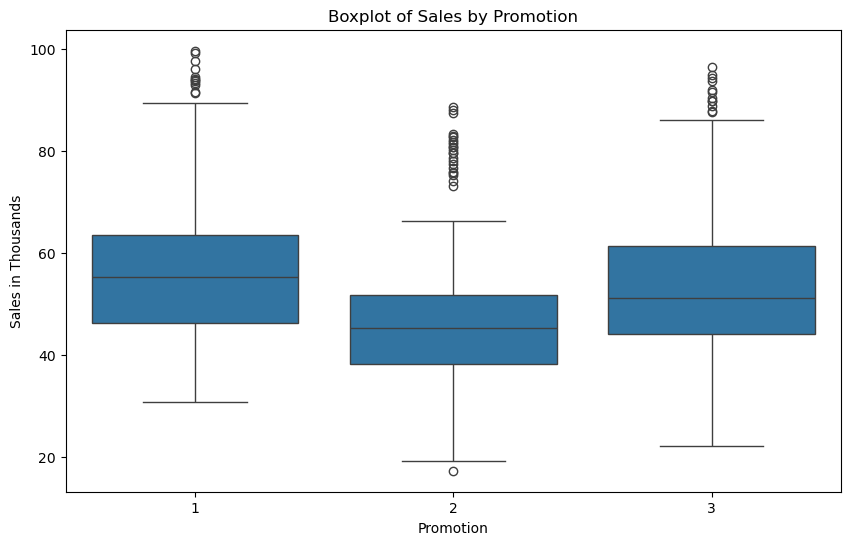

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Box plot for 'SalesInThousands' by 'Promotion'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Promotion', y='SalesInThousands')
plt.title('Boxplot of Sales by Promotion')
plt.xlabel('Promotion')
plt.ylabel('Sales in Thousands')
plt.show()


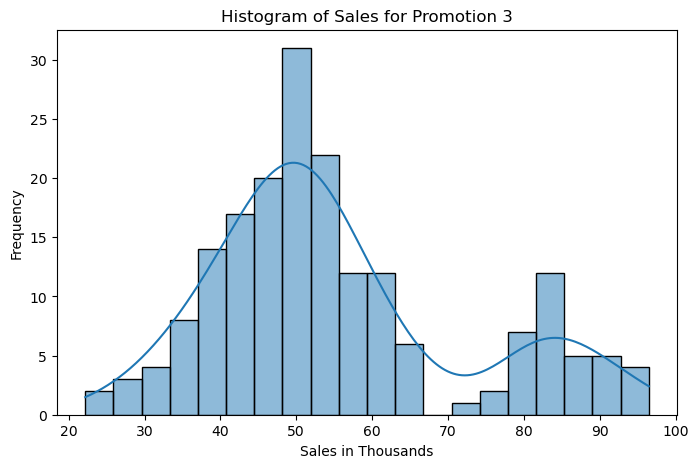

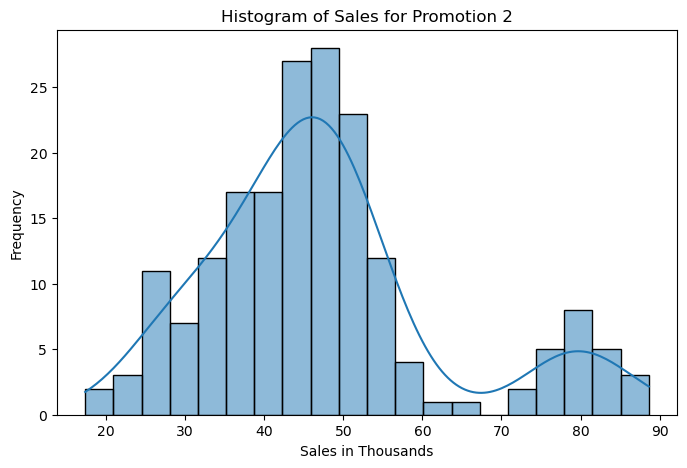

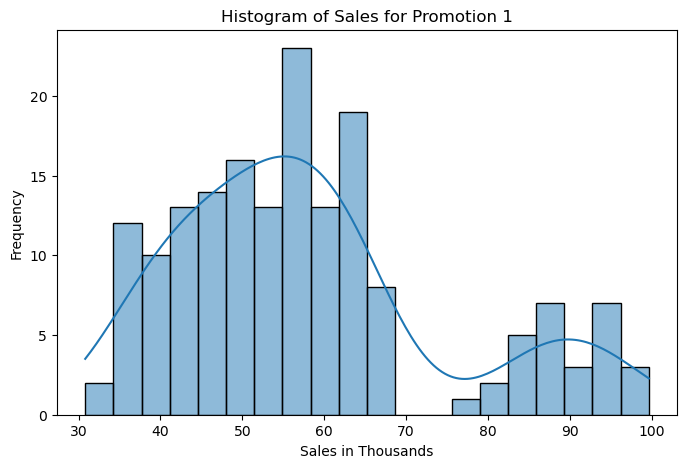

In [ ]:
promotions = df['Promotion'].unique()
for promo in promotions:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[df['Promotion'] == promo]['SalesInThousands'], kde=True, bins=20)
    plt.title(f'Histogram of Sales for Promotion {promo}')
    plt.xlabel('Sales in Thousands')
    plt.ylabel('Frequency')
    plt.show()


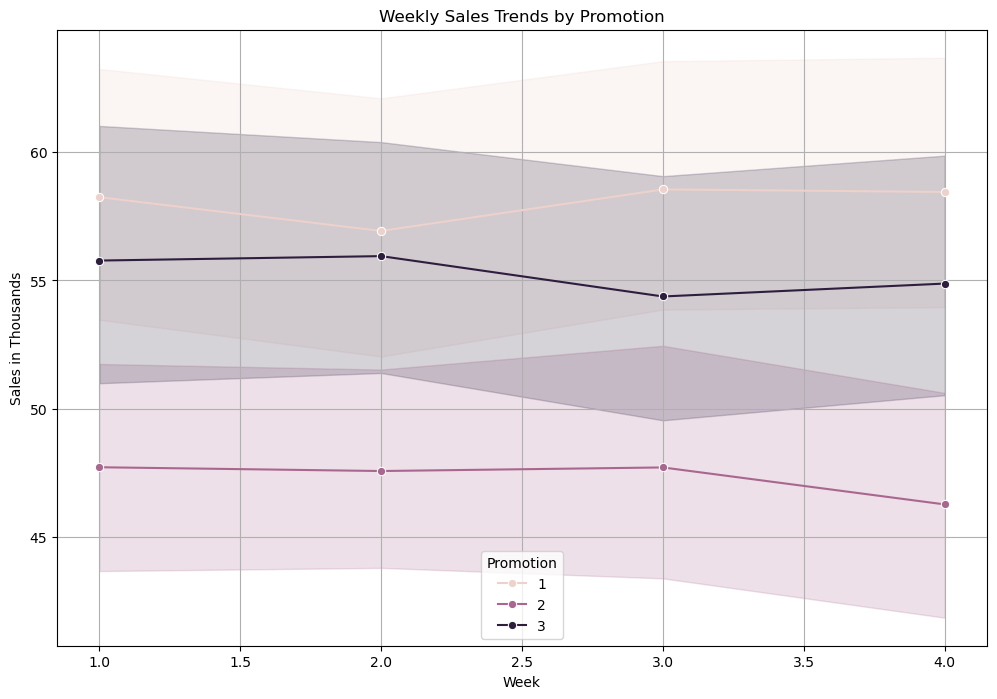

In [ ]:
# Ensure 'week' is treated as a categorical variable for analysis
df['week'] = df['week'].astype(int)

# Line plot of weekly sales for each promotion
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='week', y='SalesInThousands', hue='Promotion', marker='o')
plt.title('Weekly Sales Trends by Promotion')
plt.xlabel('Week')
plt.ylabel('Sales in Thousands')
plt.legend(title='Promotion')
plt.grid()
plt.show()


In [ ]:
# Load the Excel dataset
# Calculate the average weekly sales for each promotion
average_sales = df.groupby('Promotion')['SalesInThousands'].mean().reset_index()
average_sales.rename(columns={'SalesInThousands': 'AverageSalesInThousands'}, inplace=True)
print("Average Weekly Sales by Promotion:")
print(average_sales)


Average Weekly Sales by Promotion:
   Promotion  AverageSalesInThousands
0          1                94.298129
1          2                49.263457
2          3                55.247861


In [ ]:
import pandas as pd
from scipy.stats import f_oneway, kruskal

data = df

# Group sales data by Promotion
promotion_a = data[data['Promotion'] == 1]['SalesInThousands']
promotion_b = data[data['Promotion'] == 2]['SalesInThousands']
promotion_c = data[data['Promotion'] == 3]['SalesInThousands']

# Debug Step 1: Check the size of each group
print("Size of each promotion group:")
print(f"Promotion 1: {len(promotion_a)}")
print(f"Promotion 2: {len(promotion_b)}")
print(f"Promotion 3: {len(promotion_c)}")

# Debug Step 2: Check for missing values
print("\nMissing values in each promotion group:")
print(f"Promotion 1: {promotion_a.isna().sum()}")
print(f"Promotion 2: {promotion_b.isna().sum()}")
print(f"Promotion 3: {promotion_c.isna().sum()}")

# Clean the data: Drop missing values
promotion_a = promotion_a.dropna()
promotion_b = promotion_b.dropna()
promotion_c = promotion_c.dropna()

# Recheck group sizes after cleaning
print("\nSize of each promotion group after cleaning:")
print(f"Promotion 1: {len(promotion_a)}")
print(f"Promotion 2: {len(promotion_b)}")
print(f"Promotion 3: {len(promotion_c)}")

# Check if all groups have enough data for ANOVA (at least 2 samples each)
if len(promotion_a) < 2 or len(promotion_b) < 2 or len(promotion_c) < 2:
    print("\nOne or more groups have insufficient data for ANOVA. Falling back to Kruskal-Wallis test.")
    # Perform Kruskal-Wallis test
    stat, p_value = kruskal(promotion_a, promotion_b, promotion_c)
    print("\nKruskal-Wallis Test Results:")
    print(f"Statistic: {stat}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("The differences in sales among promotions are statistically significant.")
    else:
        print("The differences in sales among promotions are not statistically significant.")
else:
    # Perform one-way ANOVA
    f_stat, p_value = f_oneway(promotion_a, promotion_b, promotion_c)
    print("\nANOVA Results:")
    print(f"F-statistic: {f_stat}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("The differences in sales among promotions are statistically significant.")
    else:
        print("The differences in sales among promotions are not statistically significant.")


Size of each promotion group:
Promotion 1: 172
Promotion 2: 188
Promotion 3: 188

Missing values in each promotion group:
Promotion 1: 1
Promotion 2: 0
Promotion 3: 1

Size of each promotion group after cleaning:
Promotion 1: 171
Promotion 2: 188
Promotion 3: 187

ANOVA Results:
F-statistic: 1.4864366230779353
P-value: 0.22709601787227685
The differences in sales among promotions are not statistically significant.


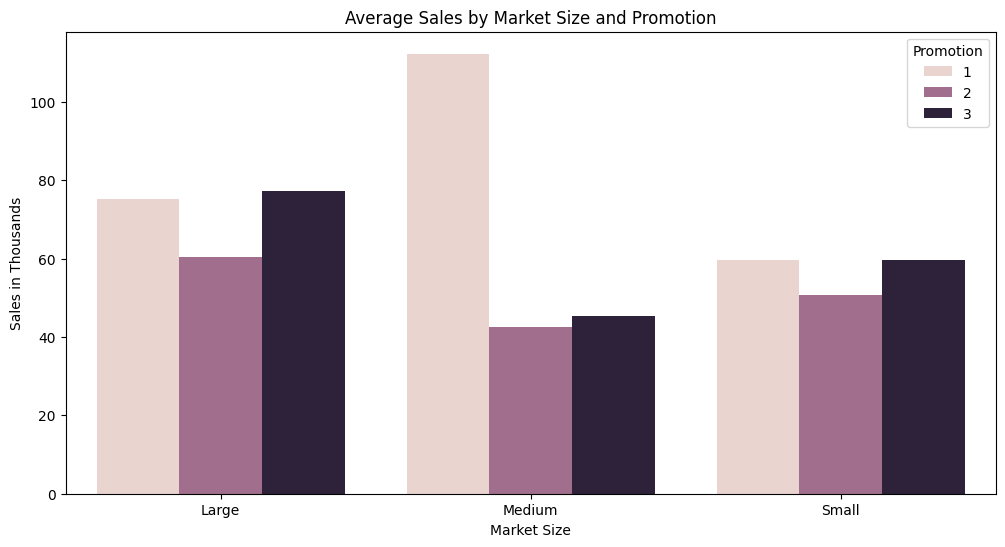

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel dataset
data = df

# Group by MarketSize and Promotion to calculate mean sales
market_size_analysis = data.groupby(['MarketSize', 'Promotion'])['SalesInThousands'].mean().reset_index()

# Visualize sales by MarketSize and Promotion
plt.figure(figsize=(12, 6))
sns.barplot(data=market_size_analysis, x='MarketSize', y='SalesInThousands', hue='Promotion')
plt.title('Average Sales by Market Size and Promotion')
plt.xlabel('Market Size')
plt.ylabel('Sales in Thousands')
plt.legend(title='Promotion')
plt.show()


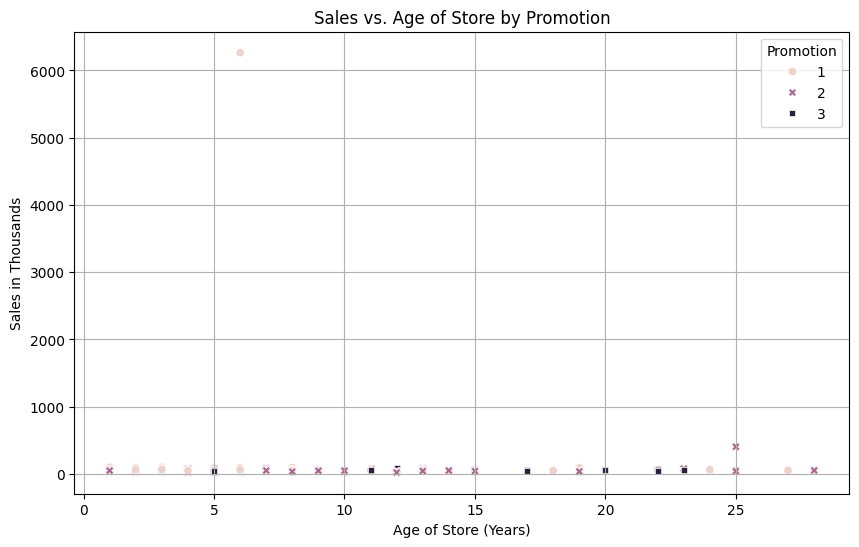

In [ ]:
# Scatterplot to analyze the relationship between AgeOfStore and Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AgeOfStore', y='SalesInThousands', hue='Promotion', style='Promotion')
plt.title('Sales vs. Age of Store by Promotion')
plt.xlabel('Age of Store (Years)')
plt.ylabel('Sales in Thousands')
plt.legend(title='Promotion')
plt.grid()
plt.show()


In [ ]:
# Correlation analysis between AgeOfStore and Sales
correlation = data[['AgeOfStore', 'SalesInThousands']].corr()
print("Correlation between AgeOfStore and Sales:")
print(correlation)


Correlation between AgeOfStore and Sales:
                  AgeOfStore  SalesInThousands
AgeOfStore          1.000000         -0.030311
SalesInThousands   -0.030311          1.000000


In [ ]:
import statsmodels.formula.api as smf

# Encode MarketSize as categorical
data['MarketSize'] = data['MarketSize'].astype('category')
data['Promotion'] = data['Promotion'].astype('category')

# Interaction analysis using OLS
model = smf.ols('SalesInThousands ~ C(MarketSize) * C(Promotion) + AgeOfStore * C(Promotion)', data=data).fit()

# Display model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       SalesInThousands   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.4955
Date:                Sun, 17 Nov 2024   Prob (F-statistic):              0.906
Time:                        22:39:21   Log-Likelihood:                -3821.4
No. Observations:                 546   AIC:                             7667.
Df Residuals:                     534   BIC:                             7718.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
data = df

# Group by Promotion to calculate mean and total sales
promotion_performance = data.groupby('Promotion')['SalesInThousands'].agg(['mean', 'sum']).reset_index()
promotion_performance.rename(columns={'mean': 'AverageSales', 'sum': 'TotalSales'}, inplace=True)

# Sort promotions by total sales
optimal_promotion = promotion_performance.sort_values(by='TotalSales', ascending=False).iloc[0]
print("Optimal Promotion Based on Total Sales:")
print(optimal_promotion)

# Display all promotion performance
print("\nPerformance of All Promotions:")
print(promotion_performance)



Optimal Promotion Based on Total Sales:
Promotion           1.000000
AverageSales       94.298129
TotalSales      16124.980000
Name: 0, dtype: float64

Performance of All Promotions:
  Promotion  AverageSales  TotalSales
0         1     94.298129    16124.98
1         2     49.263457     9261.53
2         3     55.247861    10331.35


/var/folders/b9/pg5r647976z7y62xh3r3rk040000gn/T/ipykernel_45937/3843924927.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promotion_performance = data.groupby('Promotion')['SalesInThousands'].agg(['mean', 'sum']).reset_index()


In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average sales by MarketSize and Promotion
market_promotion_analysis = data.groupby(['MarketSize', 'Promotion'])['SalesInThousands'].mean().reset_index()

# Display market-specific strategies
print("\nAverage Sales by MarketSize and Promotion:")
print(market_promotion_analysis)

# Visualization of MarketSize and Promotion interaction
plt.figure(figsize=(12, 6))
sns.barplot(data=market_promotion_analysis, x='MarketSize', y='SalesInThousands', hue='Promotion')
plt.title('Sales Performance by Market Size and Promotion')
plt.xlabel('Market Size')
plt.ylabel('Average Sales in Thousands')
plt.legend(title='Promotion')
plt.show()

# Analyze Store Age impact
store_age_analysis = data.groupby(['AgeOfStore', 'Promotion'])['SalesInThousands'].mean().reset_index()

# Visualization of Store Age and Promotion interaction
plt.figure(figsize=(12, 6))
sns.lineplot(data=store_age_analysis, x='AgeOfStore', y='SalesInThousands', hue='Promotion', marker='o')
plt.title('Sales Performance by Store Age and Promotion')
plt.xlabel('Store Age (Years)')
plt.ylabel('Average Sales in Thousands')
plt.legend(title='Promotion')
plt.grid()
plt.show()

# Recommend promotion based on MarketSize
best_market_promotion = market_promotion_analysis.loc[market_promotion_analysis.groupby('MarketSize')['SalesInThousands'].idxmax()]
print("\nRecommended Promotion for Each Market Size:")
print(best_market_promotion)


/var/folders/b9/pg5r647976z7y62xh3r3rk040000gn/T/ipykernel_45937/731766366.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  market_promotion_analysis = data.groupby(['MarketSize', 'Promotion'])['SalesInThousands'].mean().reset_index()


TypeError: agg function failed [how->mean,dtype->object]

In [106]:
# Load the dataset
data = df

# Define valid values for categorical columns
valid_market_sizes = ['Small', 'Medium', 'Large']
valid_promotions = [1, 2, 3]

# Check for invalid entries in MarketSize
invalid_market_size = data[~data['MarketSize'].isin(valid_market_sizes)]
if not invalid_market_size.empty:
    print("Invalid MarketSize entries found:")
    print(invalid_market_size)

# Check for invalid entries in Promotion
invalid_promotion = data[~data['Promotion'].isin(valid_promotions)]
if not invalid_promotion.empty:
    print("Invalid Promotion entries found:")
    print(invalid_promotion)

# Check for missing or null values in critical columns
missing_values = data[data[['MarketSize', 'Promotion', 'SalesInThousands']].isnull().any(axis=1)]
if not missing_values.empty:
    print("Rows with missing values in critical columns:")
    print(missing_values)
# Drop rows with invalid MarketSize or Promotion
cleaned_data = data[data['MarketSize'].isin(valid_market_sizes) & data['Promotion'].isin(valid_promotions)]

# Drop rows with missing critical values
cleaned_data = cleaned_data.dropna(subset=['MarketSize', 'Promotion', 'SalesInThousands'])

print("\nCleaned Dataset:")
print(cleaned_data)
# Summary of data quality checks
total_rows = len(data)
cleaned_rows = len(cleaned_data)
dropped_rows = total_rows - cleaned_rows

print(f"\nData Quality Summary:")
print(f"Total rows in original dataset: {total_rows}")
print(f"Rows retained after cleaning: {cleaned_rows}")
print(f"Rows dropped due to quality issues: {dropped_rows}")
# Generate a report for invalid entries
with open('data_quality_issues_report.txt', 'w') as report:
    if not invalid_market_size.empty:
        report.write("Invalid MarketSize entries:\n")
        report.write(invalid_market_size.to_string() + '\n\n')

    if not invalid_promotion.empty:
        report.write("Invalid Promotion entries:\n")
        report.write(invalid_promotion.to_string() + '\n\n')

    if not missing_values.empty:
        report.write("Rows with missing critical values:\n")
        report.write(missing_values.to_string() + '\n\n')

    report.write(f"Summary:\nTotal rows: {total_rows}\nRetained rows: {cleaned_rows}\nDropped rows: {dropped_rows}\n")

print("\nData quality issues report saved as 'data_quality_issues_report.txt'.")



Cleaned Dataset:
     MarketID MarketSize LocationID  AgeOfStore Promotion week  \
0           1     Medium          1           4         3    1   
1           1     Medium          1           4         3    2   
2           1     Medium          1           4         3    3   
3           1     Medium          1           4         3    4   
4           1     Medium          2           5         2    1   
..        ...        ...        ...         ...       ...  ...   
543        10      Large        919           2         1    4   
544        10      Large        920          14         2    1   
545        10      Large        920          14         2    2   
546        10      Large        920          14         2    3   
547        10      Large        920          14         2    4   

    SalesInThousands  
0              33.73  
1              35.67  
2              29.03  
3              39.25  
4              27.81  
..               ...  
543            64.34  
544  